Here we will evaluate the direction and sensitivity of different parameter regions. 

In [1]:
import os
import sys
sys.path.append('/u/vasulkar/p_emodnet_amey/Regional_canada_model/')
path1=sys.path[-1]
print(path1)
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf 
from matplotlib import cm

/u/vasulkar/p_emodnet_amey/Regional_canada_model/


Let us start with bathymetry and then go to bottom friction.


In [26]:
typ='bf'
# runsfolder=os.path.join(path1,'model_runs','snellius_runs','OpenDAruns')
runsfolder=os.path.join(path1,'model_runs','snellius_runs','OpenDAruns','2020runs')
print(runsfolder)
simfolder=runsfolder+'/Canadamodel_'+typ+'_sensitivity_r/'


/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_runs/snellius_runs/OpenDAruns/2020runs


In [27]:
import pandas as pd

# simfolder=runsfolder+'/vis_9para_32TG_model/'
resfile=simfolder+'results_dud.csv'
df=pd.read_csv(resfile,delimiter='\t',quotechar="'")
df.head()

,Iteration Cost,bf_1,bf_2,bf_3,bf_4,bf_5,bf_6,bf_7,bf_8,bf_9,...,bf_116,bf_117,bf_118,bf_119,bf_120,bf_121,bf_122,bf_123,bf_124,bf_125
1,1.454488e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.454488e+07,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.454489e+07,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.454488e+07,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.454485e+07,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
Nparams=125 #no. of domains.
key=df.keys()
costfuncvec=np.array(df[key[0]])
standardcf=costfuncvec[0]
#0.05 is bathymetry sensitivity.
if typ=='bathymetry':
    dh=0.05
else:
    dh=0.2
sencfvec=(costfuncvec[1:]-standardcf)/standardcf
sencfvec=sencfvec*100.


In [29]:
import xarray as xr
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPolygon, shape
import shapefile

import cartopy.crs as ccrs
import cartopy.feature as cpf 
from global_land_mask import globe
import pandas as pd

In [30]:
#getting the polygons.
# Load polygon from disc
import pickle
with open('/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_development/Openda_models/parampolygons', "rb") as poly_file:
    loaded_polygons = pickle.load(poly_file)

In [31]:
#reading parameter file
fname='/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_development/Openda_models/densepara_correction_template_2.xyz'
headerlist=["Lon","Lat","Val"]
pardf=pd.read_csv(fname,delim_whitespace=True,names=headerlist)
parlonvec=pardf['Lon']
parlatvec=pardf['Lat']
paramid=pardf['Val']

In [32]:
pd.Series(sencfvec).describe()
#consider senc >1%.


count    125.000000
mean       0.105088
std        0.483988
min       -1.162635
25%       -0.000015
50%        0.001395
75%        0.019058
max        3.716460
dtype: float64

In [36]:
sencfvec2=np.where(np.abs(sencfvec)>0.1,sencfvec,0)

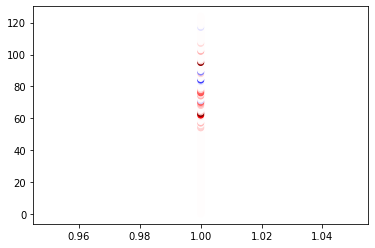

In [37]:
#getting a color map based on sensitivity
ax_a = plt.scatter(np.ones(len(sencfvec)),range(len(sencfvec)),c=sencfvec2,cmap=cm.seismic,vmin=-3,vmax=3)

In [38]:
sencfvec[62

SyntaxError: unexpected EOF while parsing (2907783553.py, line 1)

/tmp/ipykernel_8982/1308024712.py:23: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(ax_a)


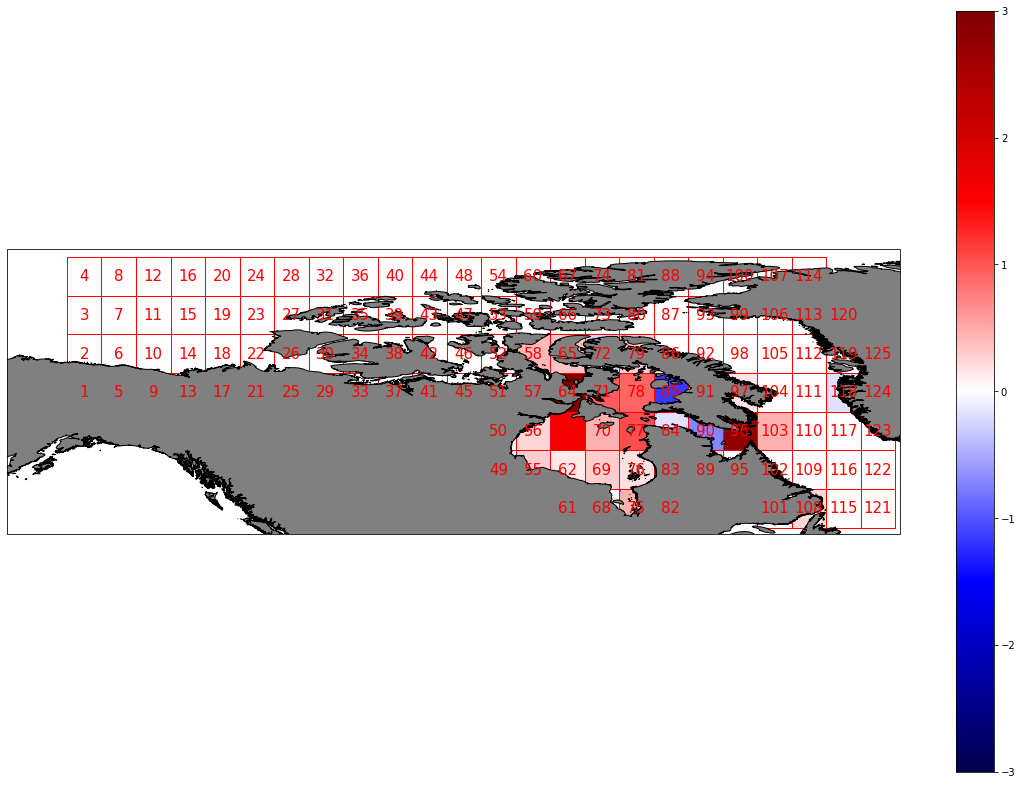

In [39]:
# marking the x-axis and y-axis  

fig=plt.figure(figsize=(20, 14), frameon=True)
# proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
proj=ccrs.PlateCarree()
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -46, 49, 84.7), crs=ccrs.PlateCarree())
# ax1.set_extent((-60, -55, 49, 84), crs=ccrs.PlateCarree())

for i in list(loaded_polygons.keys())[:]:
    ax1.add_geometries([loaded_polygons[i]],crs=ccrs.PlateCarree(),edgecolor='red',facecolor=ax_a.get_facecolors()[i-1],label=i)
    # ax1.add_geometries([loaded_polygons[i]],crs=ccrs.PlateCarree(),edgecolor='red',facecolor='None')
    x=loaded_polygons[i].centroid.x
    y=loaded_polygons[i].centroid.y
    # ax1.fill(x,y,)
    ax1.text(x, y, i, color='red', size=15, ha='center', va='center', transform=ccrs.PlateCarree())
    #getting points in polygon. from paramid.
    indparam=np.where(paramid==i)[0]
    # print(vec)
    # ax1.scatter(parlonvec[indparam],parlatvec[indparam],transform=ccrs.PlateCarree(),label=str(i))

# ax1.legend()
fig.colorbar(ax_a)
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='grey',alpha=1)
ax1.add_feature(feature)
# fig.savefig('/u/vasulkar/p_emodnet_amey/Regional_canada_model/postprocessing/calibration/figures/2020sensitvity_'+typ+'_negit.jpg',dpi=1000)
# plt.show()
    

In [91]:
poly1=loaded_polygons[87]
poly1.exterior.coords.xy

(array('d', [-76.91080729166666, -76.91080729166666, -72.58203125, -72.58203125, -76.91080729166666]),
 array('d', [73.99162946428572, 78.84737723214286, 78.84737723214286, 73.99162946428572, 73.99162946428572]))

In [11]:
sencfvec

array([-6.63009381e+04, -7.23871142e+05, -8.48122553e+05, -4.72678108e+05,
       -6.79652899e+03,  1.11348938e+05, -8.84249036e+05, -1.63383708e+05,
       -3.33789586e+05, -4.05953029e+05, -7.68715102e+04,  3.04211160e+04,
       -2.26658588e+05, -1.51508974e+06,  3.61873334e+05, -1.02676443e+06,
        3.22923159e+05, -1.96506070e+05,  4.75531104e+05,  7.36877632e+05,
       -9.49621511e+04,  8.42303193e+05,  1.68329637e+06,  5.80068656e+05,
        3.26391493e+04,  2.19540747e+06,  1.65195153e+06,  1.28407080e+06,
        2.01549633e+05,  3.54218583e+06,  2.16313893e+06, -9.66187779e+05,
        2.12835637e+06,  9.73193992e+06,  2.02640158e+06,  2.76890446e+06,
        1.01127653e+07,  9.57926710e+06,  1.14384779e+07,  3.36577327e+06,
        3.64783724e+07,  5.72363025e+07,  7.39717963e+06,  1.02301029e+07,
        2.06565490e+07,  3.19856537e+07,  6.38339910e+06,  2.65431860e+07,
        3.04944539e+06,  6.15460783e+06,  1.69888997e+07,  2.05060828e+07,
        9.45801616e+06,  

In [ ]:
perparam_mix15bounds=[0.10,0.10,0.15,0.10,0.15,0.10,0.15,0.10,0.10,0.15,0.15,0.20,0.15,0.10,0.15,0.15,0.10]

